In [1]:
import scripts.init_gpu as init_gpu
import scripts.init_dataset as init_dataset
from scripts.triplet_functions import n_neurons
import pandas as pd


init_gpu.initialize_gpus()

locations = ['LOC2', 'LOC3']

print("Loading Dataset...")
# load the dataset
df = pd.read_csv(
    f"../dataset/processed/{locations[0]}-{locations[1]}-scaled-balanced.csv")

length = len(df.columns) - 2  # subtract the two label columns

# get train-test set
train_df, test_df, train_web_samples, test_web_samples = init_dataset.get_sample(
    df, locations, range(1500), 1200)

train_df.head()

Num GPUs Available:  1
Loading Dataset...
Training Websites: [1309, 228, 51, 563, 501, 457, 285, 209, 1385, 1116, 178, 1209, 864, 65, 61, 191, 447, 476, 1034, 1232, 54, 1149, 407, 1466, 1330, 1436, 1490, 859, 451, 919, 1206, 569, 13, 326, 1429, 865, 696, 1468, 318, 440, 689, 1492, 189, 778, 198, 735, 704, 1236, 541, 88, 940, 1098, 255, 775, 161, 1130, 600, 1287, 1266, 740, 1182, 393, 142, 93, 1354, 466, 592, 163, 1482, 206, 1456, 1462, 928, 1301, 747, 333, 758, 727, 429, 1372, 546, 1399, 1327, 146, 1247, 1300, 350, 1093, 1495, 334, 946, 777, 552, 1310, 1140, 449, 1402, 664, 114, 469, 1486, 646, 821, 548, 135, 432, 1161, 644, 435, 1342, 1022, 810, 1316, 939, 292, 542, 1493, 505, 1478, 1103, 538, 1197, 877, 1195, 817, 741, 1404, 283, 1043, 1010, 186, 96, 224, 313, 1285, 327, 1487, 1221, 130, 788, 781, 1220, 958, 1083, 514, 1133, 23, 234, 1099, 1419, 1312, 1463, 1498, 601, 890, 323, 929, 6, 539, 1025, 365, 1039, 217, 1280, 611, 1308, 1338, 1415, 1477, 1366, 765, 330, 1104, 1086, 1, 1226, 

/home/e19372/DoH-Synthesis/code/scripts/init_dataset.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df.sort_values(by=["Location"], inplace=True)


,Location,Website,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,...,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127
0,LOC2,0,-0.714089,0.541197,0.391921,-0.400778,-0.266345,-0.522526,0.023889,-0.261817,0.293742,0.328137,0.126488,-0.549498,-1.544878,-0.066524,0.358774,0.462756,-0.006084,0.732340,0.795686,0.209927,-1.926165,-0.553122,-1.038216,0.053991,0.465841,0.693164,0.348125,0.819507,0.991114,0.426657,0.434773,0.842753,0.724091,-1.489046,-0.168640,-1.504361,-0.460175,-1.170200,...,0.164343,0.119994,0.093444,0.038966,0.21022,0.162792,0.119427,0.092497,0.035366,0.202943,0.150631,0.114271,0.08326,0.031206,0.182456,0.136367,0.108917,0.085165,0.032035,0.174922,0.133561,0.110018,0.087227,0.034741,0.159972,0.122191,0.097487,0.084637,0.039947,0.160207,0.125986,0.10277,0.092495,0.043004,0.158904,0.119506,0.099445,0.083843,0.037226,0.152216
1,LOC2,1006,0.093792,-1.273349,-2.142801,1.205098,1.879002,2.139593,1.482513,2.382939,0.110383,-2.678266,-2.454618,0.740625,1.503410,0.802837,-2.707920,-0.723518,0.333578,1.030483,0.523433,0.487220,0.663673,0.324062,0.841249,1.105190,0.439766,-1.321745,-0.423351,-1.206079,0.021729,-1.593981,-0.294538,0.572230,1.094341,0.751568,-1.610703,-0.333367,0.571780,1.125553,...,0.164343,0.119994,0.093444,0.038966,0.21022,0.162792,0.119427,0.092497,0.035366,0.202943,0.150631,0.114271,0.08326,0.031206,0.182456,0.136367,0.108917,0.085165,0.032035,0.174922,0.133561,0.110018,0.087227,0.034741,0.159972,0.122191,0.097487,0.084637,0.039947,0.160207,0.125986,0.10277,0.092495,0.043004,0.158904,0.119506,0.099445,0.083843,0.037226,0.152216
2,LOC2,1006,1.401091,-1.636258,0.527106,0.354928,-0.017609,-0.049260,-0.177300,-0.412692,0.110383,0.404009,0.608673,0.023890,-0.730847,-0.186436,0.476159,0.487470,0.175069,0.800487,1.079776,0.333168,0.445372,0.898768,0.755035,0.790914,0.948232,0.419784,-2.139220,0.247059,-1.627338,-0.296781,-1.409956,-0.509861,-1.244553,-0.014652,0.684058,0.814889,0.420022,0.817586,...,0.164343,0.119994,0.093444,0.038966,0.21022,0.162792,0.119427,0.092497,0.035366,0.202943,0.150631,0.114271,0.08326,0.031206,0.182456,0.136367,0.108917,0.085165,0.032035,0.174922,0.133561,0.110018,0.087227,0.034741,0.159972,0.122191,0.097487,0.084637,0.039947,0.160207,0.125986,0.10277,0.092495,0.043004,0.158904,0.119506,0.099445,0.083843,0.037226,0.152216
3,LOC2,1006,-0.831599,0.662167,0.527106,0.354928,-0.017609,-0.049260,-0.177300,-0.412692,0.110383,0.404009,0.608673,0.023890,-0.739507,-0.186436,0.476159,0.487470,0.175069,0.800487,1.079776,0.333168,0.445372,0.898768,0.755035,0.790914,0.948232,0.419784,-2.857490,0.247059,-1.627338,-0.296781,-1.409956,-0.509861,-0.756907,-0.014652,0.684058,0.814889,0.420022,0.817586,...,0.164343,0.119994,0.093444,0.038966,0.21022,0.162792,0.119427,0.092497,0.035366,0.202943,0.150631,0.114271,0.08326,0.031206,0.182456,0.136367,0.108917,0.085165,0.032035,0.174922,0.133561,0.110018,0.087227,0.034741,0.159972,0.122191,0.097487,0.084637,0.039947,0.160207,0.125986,0.10277,0.092495,0.043004,0.158904,0.119506,0.099445,0.083843,0.037226,0.152216
4,LOC2,1006,0.093792,-1.152379,-2.007616,0.827245,1.630266,1.666328,1.281324,2.311938,0.293742,-2.554975,-2.227708,0.167237,1.434131,0.682925,-2.605208,-0.624662,0.220357,0.919744,0.428736,-2.177875,-0.229375,0.354309,1.013677,0.595846,0.465841,0.733664,0.348125,-0.800961,0.110868,-2.043011,-0.208737,0.458326,1.103371,0.658693,0.583740,0.701200,0.298616,-1.216862,...,0.164343,0.119994,0.093444,0.038966,0.21022,0.162792,0.119427,0.092497,0.035366,0.202943,0.150631,0.114271,0.08326,0.031206,0.182456,0.136367,0.108917,0.085165,0.032035,0.174922,0.133561,0.110018,0.087227,0.034741,0.159972,0.122191,0.097487,0.084637,0.039947,0.160207,0.125986,0.10277,0.092495,0.043004,0.158904,0.119506,0.099445,0.083843,0.037226,0.152216


In [2]:
# dataset for the classification
source_location, target_location = locations

target_df = test_df[test_df['Location'] == target_location]
target_df.sort_values(by=['Website'], inplace=True)
target_df.reset_index(drop=True, inplace=True)
target_df.head(20)

source_df = test_df[test_df['Location'] == source_location]
source_df.sort_values(by=['Website'], inplace=True)
source_df.reset_index(drop=True, inplace=True)

source_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29700 entries, 0 to 29699
Columns: 130 entries, Location to 127
dtypes: float64(128), int64(1), object(1)
memory usage: 29.5+ MB


/tmp/ipykernel_200022/2431998659.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_df.sort_values(by=['Website'], inplace=True)
/tmp/ipykernel_200022/2431998659.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  source_df.sort_values(by=['Website'], inplace=True)


# Trained completely on source data, tested on real target data

In [3]:
import pandas as pd
import numpy as np
import scripts.classification as classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
import random
import xgboost

le = LabelEncoder()

# synthetic data
X_train = source_df.iloc[:, 2:]
y_train = le.fit_transform(source_df.Website)
X_test = target_df.iloc[:, 2:]
y_test = le.transform(target_df.Website)

#  # Train and evaluate the model
# model = xgboost.XGBClassifier(max_depth=10, n_estimators=30)
# print("Trained completely on the source data: ")
# accuracy, precision, recall, f1_score, cm = classification.evaluate_classification_model(X_train, y_train, X_test, y_test, model)

### Trained in a CNN network

In [6]:
from tensorflow import keras
import tensorflow as tf
class ResidualBlock(keras.layers.Layer):
    def __init__(self, filters, kernel_size, **kwargs):
        super(ResidualBlock, self).__init__(**kwargs)
        self.conv1 = keras.layers.Conv1D(
            filters, kernel_size, activation="relu", padding="same")
        self.conv2 = keras.layers.Conv1D(
            filters, kernel_size, activation=None, padding="same")
        self.activation = keras.layers.Activation("relu")

    def call(self, inputs):
        x = self.conv1(inputs)
        x = self.conv2(x)
        return self.activation(x + inputs)  # Adding the residual connection

def build_classifier(input_dim, hidden_dim, num_classes):
    base_model = keras.Sequential([
        keras.layers.InputLayer(input_shape=(input_dim, 1)),
        keras.layers.Conv1D(hidden_dim, kernel_size=7,
                            strides=2, activation="relu", padding="same"),
        keras.layers.BatchNormalization(),
        ResidualBlock(hidden_dim, kernel_size=5),
        keras.layers.Conv1D(hidden_dim * 2, kernel_size=3,
                            strides=2, activation="relu", padding="same"),
        keras.layers.BatchNormalization(),
        ResidualBlock(hidden_dim * 2, kernel_size=3),
        keras.layers.BatchNormalization(),
        keras.layers.Flatten(),
    ])

    classifier = keras.Sequential([
        base_model,
        keras.layers.Dense(hidden_dim * 2, activation="relu"),
        keras.layers.BatchNormalization(),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(num_classes)  # No softmax for logits
    ])

    return classifier

Epoch 1/20


/home/e19372/anaconda3/envs/doh_synth_env/lib/python3.11/site-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(
I0000 00:00:1737570672.636096  203215 service.cc:148] XLA service 0x79bf70017a20 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1737570672.646686  203215 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce RTX 3090 Ti, Compute Capability 8.6
2025-01-23 00:01:13.156206: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1737570673.783955  203215 cuda_dnn.cc:529] Loaded cuDNN version 90300
2025-01-23 00:01:14.111294: W external/local_xla/xla/service/gpu/nvptx_compiler.cc:930] The NVIDIA driver's CUDA version is 12.2 which is older than the PTX compiler version 12.5.82. Because the driver is older than the PTX compi

 43/929 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.0158 - loss: 6.0710 

I0000 00:00:1737570680.935545  203215 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


923/929 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3524 - loss: 3.3303

2025-01-23 00:01:25.538052: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1883', 232 bytes spill stores, 236 bytes spill loads



929/929 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.3539 - loss: 3.3205
Epoch 2/20
929/929 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7980 - loss: 0.7074
Epoch 3/20
929/929 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8419 - loss: 0.5072
Epoch 4/20
929/929 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8762 - loss: 0.3850
Epoch 5/20
929/929 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8894 - loss: 0.3202
Epoch 6/20
929/929 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8923 - loss: 0.3128
Epoch 7/20
929/929 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9006 - loss: 0.2807
Epoch 8/20
929/929 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9094 - loss: 0.2532
Epoch 9/20
929/929 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9162 - loss: 0.2345
Epoch 10/20
929/929 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9167 - loss: 0.2329
Epoch 11/20
929/929 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9220 - loss: 0.2122
Epoch 12/20
929/929 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accurac

In [ ]:
from sklearn.metrics import accuracy_score, f1_score
model = build_classifier(input_dim=length, hidden_dim=96, num_classes=len(test_web_samples))
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)
model.fit(X_train, y_train, batch_size=32, epochs=20, shuffle=True)
# Get logits from model prediction
logits = model.predict(X_test)

# Apply softmax to get probabilities
probabilities = tf.nn.softmax(logits).numpy()

# Get predicted class by selecting the class with highest probability
y_pred = np.argmax(probabilities, axis=1)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

f1 = f1_score(y_test, y_pred, average='weighted')  # Use weighted average for imbalanced data
print(f"F1 Score: {f1:.4f}")

  1/929 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step

929/929 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Accuracy: 0.2626
F1 Score: 0.2441


# Trained completely on Synthetic Data, test on real data

In [9]:
synthetic_df = pd.read_csv(f'../synthesized/{target_location}-VAE-Sampling.csv')
synthetic_df['Location'] = target_location
synthetic_df = synthetic_df[synthetic_df['Location'] == target_location]
synthetic_df.sort_values(by=['Website'], inplace=True)
synthetic_df.reset_index(drop=True, inplace=True)
synthetic_df.head(20)

,Location,Website,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,...,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127
0,LOC3,8,-0.801097,0.615181,0.486813,-0.093054,-0.036950,-0.038655,-0.154893,-0.410852,0.125459,0.413805,0.366333,0.025169,-0.745871,-0.205958,0.432189,0.613172,0.255371,0.795360,0.954577,0.324315,-0.535657,-2.739595,0.269144,-3.159148,-0.418931,0.390319,0.867225,0.730581,-1.609323,-0.250928,0.505421,0.908549,0.842472,-1.371934,-0.220339,0.501074,0.929169,0.728819,...,0.706278,-2.653882,-0.255431,0.813479,0.968307,0.784570,-0.073740,0.461185,0.303371,0.202163,-3.176988,-0.389997,0.679713,1.206371,0.516113,0.880956,1.340733,0.629781,-3.600099,-0.181180,-0.153915,0.433763,0.520938,1.030614,0.627094,-3.284864,-0.301891,-0.245115,-3.342043,0.098388,1.010737,1.381215,0.774437,-4.274537,-0.397408,-3.771736,-0.462209,-0.678699,0.533888,0.704908
1,LOC3,8,-0.815983,0.624921,0.492457,-0.097545,-0.031203,-0.048908,-0.150839,-0.393234,0.115055,0.401166,0.354536,0.021898,-0.756619,-0.200891,0.440968,0.609265,0.248064,0.794166,0.953027,0.316028,-0.517619,-2.766729,0.254143,-3.154434,-0.414109,0.388955,0.866262,0.743698,-1.649488,-0.244881,0.485870,0.926196,0.841446,-1.406608,-0.218507,0.488831,0.953089,0.740573,...,0.606091,-2.611491,-0.289277,0.672803,0.910531,0.799682,0.516571,0.756064,0.951081,0.410307,-3.072308,-0.439858,0.682965,1.236678,0.550735,0.940887,1.197089,0.538074,-3.391568,-0.270888,0.776706,-0.609679,0.175245,0.904013,0.669747,-2.956333,-0.358175,-0.177188,-3.501562,-0.114892,0.978817,1.281078,0.795818,-4.073562,-0.394830,-3.503101,-0.515851,-0.562493,0.485425,0.847019
2,LOC3,8,-0.766306,0.587604,0.450566,-0.191988,0.139999,0.059652,-0.088374,-0.502006,0.202204,0.409344,0.136938,-0.056980,-1.027741,-0.168223,0.373684,0.635023,0.209960,-1.100657,-0.280673,0.418120,0.678447,0.130366,-1.242744,-0.040002,0.338053,0.711234,0.404372,-1.133363,-0.015426,0.662883,0.665334,0.357631,-0.652759,0.061923,0.613452,0.908701,0.185938,-0.950471,...,0.067669,0.054917,0.481284,0.937721,1.429395,-1.173187,-0.799979,-0.089083,0.640041,0.250329,0.180261,0.256576,0.256388,1.025422,0.113975,0.122620,0.271398,0.287275,-0.206279,0.380618,0.868151,0.339152,0.614189,0.436115,0.373071,-0.088430,0.077884,0.269179,-3.149128,-0.430595,-0.060551,0.106505,0.349427,-0.139806,0.444249,-0.175151,0.478087,-0.527670,0.664492,0.641329
3,LOC3,8,-0.798408,0.625453,0.548506,-0.216487,-0.008591,-0.085385,-0.188093,-0.392103,0.010027,0.478694,0.395822,0.024090,-1.052350,-0.219742,0.457356,0.586737,0.115925,-1.170633,-0.259916,0.451706,0.735578,0.280956,-1.288967,0.042407,0.586214,0.688393,0.390481,-1.152426,-0.007588,0.619316,0.784210,0.408216,-0.785375,0.049644,0.676895,0.895801,0.048266,-1.113967,...,0.162957,0.292017,0.668924,0.857247,0.497192,-0.313997,-0.270565,0.688754,1.077942,0.070908,0.183445,0.593851,0.332978,0.872942,0.609984,1.209190,0.866615,-1.260185,-0.691021,-0.205251,1.054963,0.940703,1.355417,-0.046931,0.262621,-0.976918,-0.031926,0.168713,-2.707478,-0.303959,-3.496777,0.008254,1.124100,-2.136851,-0.222633,-5.190058,-0.725888,-2.748366,-0.404062,0.763907
4,LOC3,8,-0.737540,0.593112,0.341806,-0.155582,0.113799,0.060061,-0.101381,-0.403733,0.278271,0.379632,0.149379,-0.155203,-1.147017,-0.160847,0.406057,0.592908,0.210356,-1.225592,-0.235866,0.450849,0.608286,0.219798,-1.273395,-0.023650,0.398593,0.538564,0.457176,-1.041238,0.028675,0.561961,0.508286,0.051039,-0.700248,-0.048575,0.562713,0.566067,-0.050249,-1.090472,...,0.095939,0.076513,0.756069,0.616763,-0.004957,0.349419,0.102758,0.139234,0.167838,0.219118,0.240403,0.307171,0.160281,0.910829,0.344169,-0.018260,0.315400,-0.916335,-1.215678,0.417142,1.545992,0.568815,1.047525,0.392830,0.384393,0.028626,0.522895,0.520082,-3.075598,-0.487053,-0.112318,-0.100554,0.341356,-0.177396,0.352202,-0.238037,0.549598,-0.412714,0.670108,0.754958


In [10]:
le = LabelEncoder()

# synthetic data
X_train = synthetic_df.iloc[:, 2:]
y_train = le.fit_transform(synthetic_df.Website)
X_test = target_df.iloc[:, 2:]
y_test = le.transform(target_df.Website)

In [15]:
model = build_classifier(input_dim=length, hidden_dim=96, num_classes=len(test_web_samples))
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

/home/e19372/anaconda3/envs/doh_synth_env/lib/python3.11/site-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [20]:
from sklearn.metrics import accuracy_score, f1_score


model.fit(X_train, y_train, batch_size=32, epochs=10, shuffle=True)

# Get logits from model prediction
logits = model.predict(X_test)

# Apply softmax to get probabilities
probabilities = tf.nn.softmax(logits).numpy()

# Get predicted class by selecting the class with highest probability
y_pred = np.argmax(probabilities, axis=1)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

f1 = f1_score(y_test, y_pred, average='weighted')  # Use weighted average for imbalanced data
print(f"F1 Score: {f1:.4f}")

Epoch 1/10
9282/9282 ━━━━━━━━━━━━━━━━━━━━ 42s 5ms/step - accuracy: 0.8589 - loss: 0.4479
Epoch 2/10
9282/9282 ━━━━━━━━━━━━━━━━━━━━ 43s 5ms/step - accuracy: 0.8598 - loss: 0.4434
Epoch 3/10
9282/9282 ━━━━━━━━━━━━━━━━━━━━ 43s 5ms/step - accuracy: 0.8597 - loss: 0.4383
Epoch 4/10
9282/9282 ━━━━━━━━━━━━━━━━━━━━ 43s 5ms/step - accuracy: 0.8626 - loss: 0.4349
Epoch 5/10
9282/9282 ━━━━━━━━━━━━━━━━━━━━ 43s 5ms/step - accuracy: 0.8623 - loss: 0.4311
Epoch 6/10
9282/9282 ━━━━━━━━━━━━━━━━━━━━ 43s 5ms/step - accuracy: 0.8658 - loss: 0.4242
Epoch 7/10
9282/9282 ━━━━━━━━━━━━━━━━━━━━ 43s 5ms/step - accuracy: 0.8671 - loss: 0.4193
Epoch 8/10
9282/9282 ━━━━━━━━━━━━━━━━━━━━ 43s 5ms/step - accuracy: 0.8673 - loss: 0.4172
Epoch 9/10
9282/9282 ━━━━━━━━━━━━━━━━━━━━ 38s 4ms/step - accuracy: 0.8692 - loss: 0.4095
Epoch 10/10
9282/9282 ━━━━━━━━━━━━━━━━━━━━ 43s 5ms/step - accuracy: 0.8711 - loss: 0.4079
929/929 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
Accuracy: 0.1305
F1 Score: 0.1191


In [33]:
from sklearn.metrics import confusion_matrix
import scripts.classification as classification

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

classification.show_confusion_matrix_heatmap(cm, le, "Confusion Matrix (Trained Completely on Synthetic Data)", False)

TypeError: show_confusion_matrix_heatmap() takes 3 positional arguments but 4 were given

# Train on Real Target Data, Test on Target Data 

In [47]:
from sklearn.metrics import accuracy_score, f1_score
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
random_state = 42
target_train, target_test = train_test_split(target_df, test_size=0.8, random_state=random_state, stratify=target_df['Website'])

X_train = target_train.iloc[:, 2:]
y_train = le.fit_transform(target_train.Website)
X_test = target_test.iloc[:, 2:]
y_test = le.transform(target_test.Website)

model = build_classifier(input_dim=length, hidden_dim=96, num_classes=len(test_web_samples))
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

model.fit(X_train, y_train, batch_size=32, epochs=100, shuffle=True)

# Get logits from model prediction
logits = model.predict(X_test)

# Apply softmax to get probabilities
probabilities = tf.nn.softmax(logits).numpy()

# Get predicted class by selecting the class with highest probability
y_pred = np.argmax(probabilities, axis=1)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

f1 = f1_score(y_test, y_pred, average='weighted')  # Use weighted average for imbalanced data
print(f"F1 Score: {f1:.4f}")

Epoch 1/100


/home/e19372/anaconda3/envs/doh_synth_env/lib/python3.11/site-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


186/186 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.0511 - loss: 5.3974
Epoch 2/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3679 - loss: 2.8444
Epoch 3/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6101 - loss: 1.6643
Epoch 4/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7580 - loss: 1.0256
Epoch 5/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8171 - loss: 0.7288
Epoch 6/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8566 - loss: 0.5322
Epoch 7/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8702 - loss: 0.4805
Epoch 8/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8864 - loss: 0.4011
Epoch 9/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8990 - loss: 0.3458
Epoch 10/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9139 - loss: 0.2829
Epoch 11/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9142 - loss: 0.2827
Epoch 12/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/ste

# Train Partially on Synthetic Data
Real data + Lot of synthetic data

In [45]:
# Combine X_train with synthetic data
X_train = pd.concat([X_train, synthetic_df.iloc[:, 2:]], ignore_index=True)

# Combine y_train with synthetic data
y_train = np.concatenate([y_train, le.transform(synthetic_df.Website)])

model = build_classifier(input_dim=length, hidden_dim=96, num_classes=len(test_web_samples))
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

model.fit(X_train, y_train, batch_size=32, epochs=20, shuffle=True)

# Get logits from model prediction
logits = model.predict(X_test)

# Apply softmax to get probabilities
probabilities = tf.nn.softmax(logits).numpy()

# Get predicted class by selecting the class with highest probability
y_pred = np.argmax(probabilities, axis=1)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

f1 = f1_score(y_test, y_pred, average='weighted')  # Use weighted average for imbalanced data
print(f"F1 Score: {f1:.4f}")

/home/e19372/anaconda3/envs/doh_synth_env/lib/python3.11/site-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Epoch 1/20
18749/18749 ━━━━━━━━━━━━━━━━━━━━ 88s 5ms/step - accuracy: 0.4674 - loss: 2.1604
Epoch 2/20
18749/18749 ━━━━━━━━━━━━━━━━━━━━ 85s 5ms/step - accuracy: 0.6639 - loss: 1.1940
Epoch 3/20
18749/18749 ━━━━━━━━━━━━━━━━━━━━ 85s 5ms/step - accuracy: 0.7103 - loss: 0.9978
Epoch 4/20
18749/18749 ━━━━━━━━━━━━━━━━━━━━ 85s 5ms/step - accuracy: 0.7411 - loss: 0.8785
Epoch 5/20
18749/18749 ━━━━━━━━━━━━━━━━━━━━ 86s 5ms/step - accuracy: 0.7610 - loss: 0.8017
Epoch 6/20
18749/18749 ━━━━━━━━━━━━━━━━━━━━ 87s 5ms/step - accuracy: 0.7760 - loss: 0.7436
Epoch 7/20
18749/18749 ━━━━━━━━━━━━━━━━━━━━ 85s 5ms/step - accuracy: 0.7880 - loss: 0.6998
Epoch 8/20
18749/18749 ━━━━━━━━━━━━━━━━━━━━ 85s 5ms/step - accuracy: 0.7973 - loss: 0.6652
Epoch 9/20
18749/18749 ━━━━━━━━━━━━━━━━━━━━ 82s 4ms/step - accuracy: 0.8057 - loss: 0.6347
Epoch 10/20
18749/18749 ━━━━━━━━━━━━━━━━━━━━ 81s 4ms/step - accuracy: 0.8122 - loss: 0.6083
Epoch 11/20
18749/18749 ━━━━━━━━━━━━━━━━━━━━ 87s 5ms/step - accuracy: 0.8194 - loss: 0.58

In [42]:
import pandas as pd
import numpy as np
import scripts.classification as classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
import random

def prepare_data(target_df, synthetic_df, available_websites, missing_websites, test_size=0.2, random_state=42):
    # Split the target data into initial train and test sets
    target_train, target_test = train_test_split(target_df, test_size=test_size, random_state=random_state, stratify=target_df['Website'])
    
    # Filter target data for available websites (for training)
    target_train_data = target_train[target_train['Website'].isin(available_websites)]
    
    # Get synthetic data for missing websites (for training)
    synthetic_train_data = synthetic_df[synthetic_df['Website'].isin(missing_websites)]
    
    # Combine real and synthetic data for training
    train_data = pd.concat([target_train_data, synthetic_train_data], axis=0)
    
    # Prepare features and labels for training
    X_train = train_data.iloc[:, 2:]  # All columns except 'Location' and 'Website'
    y_train = train_data['Website']
    
    # Prepare test data (only real data from the target test set)
    X_test = target_test.iloc[:, 2:]
    y_test = target_test['Website']
    
    # Encode labels
    le = LabelEncoder()
    y_train_encoded = le.fit_transform(y_train)
    y_test_encoded = le.transform(y_test)
    
    return X_train, y_train_encoded, X_test, y_test_encoded, le

for i in range(10):
    available_websites = random.sample(test_web_samples, 250)
    missing_websites = list(set(test_web_samples) - set(available_websites))

    print("Available websites:", available_websites)
    print("Missing websites:", missing_websites)

    # using synthetic
    # Prepare the data
    X_train, y_train, X_test, y_test, le = prepare_data(target_df, synthetic_df, available_websites, missing_websites)

    # Train and evaluate the model
    model = RandomForestClassifier()
    print("Trained partially on the synthesized data: ")
    accuracy, precision, recall, f1_score, cm = classification.evaluate_classification_model(X_train, y_train, X_test, y_test, model)
    # classification.show_confusion_matrix_heatmap(cm, le, f"Synthetic Data: missing classes: {missing_websites}")
    
    # using real data from X
    # Prepare the data
    X_train, y_train, X_test, y_test, le = prepare_data(target_df, train_location_df, available_websites, missing_websites)

    # Train and evaluate the model
    model = RandomForestClassifier()
    print("Trained partially on the data from another location: ")
    accuracy, precision, recall, f1_score, confusion_matrix = classification.evaluate_classification_model(X_train, y_train, X_test, y_test, model)
    # classification.show_confusion_matrix_heatmap(cm, le, f"From LOC1: missing classes: {missing_websites}")


Available websites: [394, 951, 885, 591, 1117, 991, 187, 1013, 1416, 705, 874, 1315, 510, 347, 876, 588, 785, 884, 992, 213, 325, 126, 1425, 562, 1095, 581, 1097, 1400, 1102, 1348, 106, 558, 794, 99, 872, 307, 373, 554, 762, 1296, 814, 597, 182, 128, 927, 1114, 444, 1065, 653, 1446, 238, 1176, 556, 846, 623, 760, 945, 353, 184, 420, 1264, 847, 359, 441, 782, 288, 789, 419, 520, 780, 961, 482, 297, 111, 11, 979, 112, 813, 434, 948, 137, 933, 515, 383, 1077, 754, 1413, 1193, 544, 372, 835, 787, 385, 550, 473, 733, 602, 158, 181, 491, 1162, 573, 1442, 1003, 315, 133, 243, 1286, 37, 1041, 1084, 1358, 1294, 1037, 397, 36, 381, 190, 795, 950, 1229, 391, 1331, 690, 310, 346, 214, 1441, 1164, 494, 44, 1141, 1281, 1401, 1244, 983, 15, 91, 675, 1289, 531, 374, 84, 635, 1113, 1076, 616, 1143, 845, 964, 1341, 720, 1305, 1094, 49, 669, 1249, 1008, 1230, 654, 34, 1297, 526, 1211, 8, 706, 547, 640, 917, 682, 1319, 1349, 827, 80, 1028, 1227, 575, 351, 1409, 915, 998, 722, 1311, 405, 1299, 805, 952, 96

KeyboardInterrupt: 

# Train on Synthetic, Test on Actual

In [4]:
def preprocess_data_for_web_classification(train_location_df, target_location_df, train_location, test_location):
    le = LabelEncoder()
    X_train = train_location_df[train_location_df['Location'] == train_location].drop(
        ['Location', 'Website'], axis=1)
    X_test = target_location_df[target_location_df['Location'] == test_location].drop(
        ['Location', 'Website'], axis=1)
    
    y_train = train_location_df[train_location_df['Location'] == train_location]['Website']
    y_test = target_location_df[target_location_df['Location'] == test_location]['Website']

    y_test = le.fit_transform(y_test)
    y_train = le.fit_transform(y_train)

    return X_train, y_train, X_test, y_test, le



In [6]:
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
import scripts.classification as classification

model = RandomForestClassifier()
X_train, y_train, X_test, y_test, le = preprocess_data_for_web_classification(synthetic_df, target_df, 'LOC2', 'LOC2')
accuracy, precision, recall, f1_score, cm = classification.evaluate_classification_model(X_train, y_train, X_test, y_test, model)

Accuracy: 11.76, F1 Score:  8.87, Precision:  11.01, Recall:  11.76


In [7]:
model.feature_importances_

array([0.00551038, 0.00865423, 0.00499711, 0.00930905, 0.00657184,
       0.00582409, 0.00491639, 0.00445065, 0.00935057, 0.00445735,
       0.00599664, 0.01181599, 0.01009915, 0.00987499, 0.00678659,
       0.00784897, 0.01096159, 0.0110471 , 0.01190982, 0.0083488 ,
       0.00934716, 0.01057891, 0.01077117, 0.01087088, 0.00809168,
       0.00940118, 0.01053337, 0.01014823, 0.0098367 , 0.00756151,
       0.00939466, 0.00902372, 0.0096759 , 0.00971414, 0.00686099,
       0.00902069, 0.00925922, 0.0091321 , 0.00925508, 0.0060042 ,
       0.00922879, 0.00883642, 0.00873171, 0.00921564, 0.00595471,
       0.00871605, 0.00949108, 0.00927673, 0.00763584, 0.00633038,
       0.00829786, 0.00863335, 0.00873818, 0.00842418, 0.00566738,
       0.00906406, 0.00794059, 0.0088508 , 0.00759698, 0.0056253 ,
       0.00730147, 0.00795783, 0.00725209, 0.00767712, 0.00515663,
       0.00846798, 0.00887356, 0.00750193, 0.00831806, 0.00588214,
       0.00823078, 0.00964374, 0.00782754, 0.00814804, 0.00582

In [14]:
true_pos_synths = np.zeros(shape=(len(test_web_samples)))
for i in range(len(test_web_samples)):
    true_pos_synths[i] = cm[i][i]
    
print(true_pos_synths)

[ 35.  33.  16. 137.   0.   0.   0.  41.   4.   4. 104.  49.   0.   7.
   7.   0.  19.  17.   0.   0.  41. 127.  88.   0.   0.   0.   2.  24.
   2.   3.   8.   0.   0.  47.   1.  14.   0.   2.   0.   0.   0.   0.
   0.   6.   7.  42.   0.   0.   0.   0. 111.   0.   0.  21.   0.   0.
  54.   0.   3.  42.   0.   2.   0.  11.  23.   0.  67.   0.   0.   1.
   0.   0.   0.   0.  62.  56.  19.   0.   0.   4.  15.   0.  61.   0.
   0.   0.  12.  99.   4. 159.  65.   0.   2.   0.  51.   2.   5.  17.
  61.  88.   4. 131.  14.   5.   0. 118.   0.   2.   0.   0.  28.   0.
  71.   0. 142.   0. 124.   0.   9.   0.   0.  36.   0.  18.  77.   0.
   0.   0.  29.  53.  50.  31.   0.  12.   0.   2. 145.  61.  35.   0.
   1.   2.   0.  56.  10.  84.   0. 113.  83. 182.   0. 118.   0.  52.
   0. 183.   2.   4.   1.  66.  50.   0.  39.   0.   0.  28. 101.   0.
   0.   8.   0.  54.  24.  38.  69.   0.   0.   3. 105.   0.  81.   0.
   1.   0.  83.   0.   3.  94.   0.   0.  46.   0. 125.  29.  62.   7.
   0. 

# Train of another Location, test of Target location

In [22]:
from sklearn.ensemble import RandomForestClassifier


model = RandomForestClassifier()
X_train, y_train, X_test, y_test, le = preprocess_data_for_web_classification(train_location_df, target_df, 'LOC1', 'LOC2')
accuracy, precision, recall, f1_score, confusion_matrix = classification.evaluate_classification_model(X_train, y_train, X_test, y_test, model)

Accuracy: 63.81, F1 Score:  65.51, Precision:  72.42, Recall:  63.81


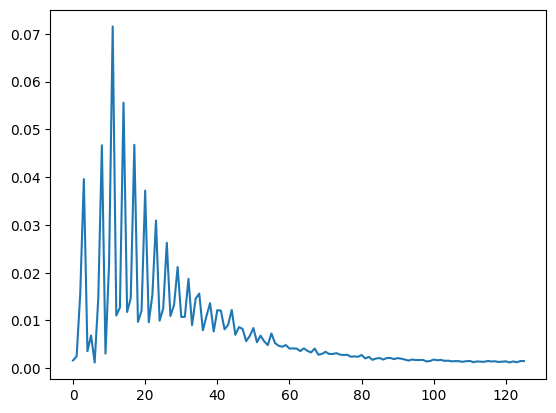

In [35]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(model.feature_importances_)
plt.show()

pandas.core.frame.DataFrame

In [ ]:
step = 10
# Loop through each step and set elements to zero
print("0.815")
for i in range(0, X_train.shape[1], step):
    _, _, X_test, y_test, le = preprocess_data_for_web_classification(train_location_df[train_location_df['Website'] == 8], target_df[target_df['Website'] == 8], 'LOC1', 'LOC2')
    # print(X_test.shape, y_test.shape)
    X_test_copy = X_test.copy()
    X_test_copy.iloc[:, i:i + step] = 0
    accuracy = model.score(X_test_copy, y_test)
    print(accuracy)


81.5
0.785
0.695
0.78
0.66
0.79
0.83
0.825
0.82
0.81
0.825
0.8
0.795
0.815


In [18]:
true_pos_dif_location = np.zeros(shape=(len(test_web_samples)))
for i in range(len(test_web_samples)):
    true_pos_dif_location[i] = confusion_matrix[i][i]
    
print(true_pos_dif_location)

[154. 145. 136. 175.  73. 146. 162. 139. 139. 141. 179. 111. 139.  40.
  12. 134. 146. 103. 153. 100.  87. 121. 126. 144. 178. 167.  55. 174.
 117.  83. 126.  50.  77. 124. 134. 141.  95. 118. 143. 130.  27.  75.
 114. 162. 106. 115.  99. 185. 121. 126. 156. 108. 122.  90. 175. 115.
 152. 175. 173. 183. 153.  98. 117.  92. 155. 153. 148.   0. 154. 130.
 186. 145. 185.   4. 125. 159.  37.   4. 146.  92. 181. 159. 159. 134.
 126. 130. 125.  77. 175. 169.  96.  99.  96. 107. 139.  72. 139. 118.
  54. 124. 176. 188. 140. 103. 137. 132. 134.  87. 135. 126. 169. 185.
 173. 137. 175. 141. 139. 146. 116. 149. 126. 169. 112. 100. 138. 149.
 150.  91. 152. 175. 116. 142. 146. 144.  62. 129. 181. 187. 181. 168.
 131. 155. 178.  99. 166. 143. 119. 142.  28. 130.   0. 144. 129. 150.
 181. 175.  98. 168. 105. 158. 110. 145. 141. 122. 110. 163. 171.  92.
 142. 164. 110. 147. 154. 103. 123. 171. 116. 141. 182. 110. 126. 138.
 179. 142. 117. 138. 113. 171. 143. 177. 144. 149. 180. 135. 127. 118.
  53. 

In [19]:
true_pos_synths > true_pos_dif_location

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

# Train on both synthetic and other location's data and test on the actual

In [25]:
mixed_df = pd.concat((synthetic_df, train_location_df), axis = 0)

In [37]:
mixed_df.sort_values(by=['Website'], inplace=True)

In [40]:
X_train = mixed_df.iloc[:, 2:]
y_train = mixed_df.Website
X_test = target_df.iloc[:, 2:]
y_test = target_df.Website

le = LabelEncoder()
y_test = le.fit_transform(y_test)
y_train = le.transform(y_train)

In [41]:
model = RandomForestClassifier()
accuracy, precision, recall, f1_score, confusion_matrix = classification.evaluate_classification_model(X_train, y_train, X_test, y_test, model)

Accuracy: 60.15, F1 Score:  60.53, Precision:  65.77, Recall:  60.15


# Location Classification using Synthetic Data

The location classification had an high accuracy with just a XGBoostClassifier model. If our synthetic data is good, it should also be easily distinguishable. 

In [45]:
synthetic_df = pd.concat((pd.read_csv('../synthesized/sampling-LOC1-target-LOC2.csv').iloc[:, 1:], 
                         pd.read_csv('../synthesized/sampling-LOC2-target-LOC1.csv').iloc[:, 1:] 
                          ), axis=0)

In [ ]:
from scripts.init_dataset import get_sample

train_synthetic_df, test_synthetic_df, _, _ = get_sample(synthetic_df, ['LOC1', 'LOC2'], test_web_samples, 200)

Training Websites: [1309, 228, 51, 563, 501, 457, 285, 209, 1385, 1116, 178, 1209, 864, 65, 61, 191, 447, 476, 1034, 1232, 54, 1149, 407, 1466, 1330, 1436, 1490, 859, 451, 919, 1206, 569, 13, 326, 1429, 865, 696, 1468, 318, 440, 689, 1492, 189, 778, 198, 735, 704, 1236, 541, 88, 940, 1098, 255, 775, 161, 1130, 600, 1287, 1266, 740, 1182, 393, 142, 93, 1354, 466, 592, 163, 1482, 206, 1456, 1462, 928, 1301, 747, 333, 758, 727, 429, 1372, 546, 1399, 1327, 146, 1247, 1300, 350, 1093, 1495, 334, 946, 777, 552, 1310, 1140, 449, 1402, 664, 114, 469, 1486, 646, 821, 548, 135, 432, 1161, 644, 435, 1342, 1022, 810, 1316, 939, 292, 542, 1493, 505, 1478, 1103, 538, 1197, 877, 1195, 817, 741, 1404, 283, 1043, 1010, 186, 96, 224, 313, 1285, 327, 1487, 1221, 130, 788, 781, 1220, 958, 1083, 514, 1133, 23, 234, 1099, 1419, 1312, 1463, 1498, 601, 890, 323, 929, 6, 539, 1025, 365, 1039, 217, 1280, 611, 1308, 1338, 1415, 1477, 1366, 765, 330, 1104, 1086, 1, 1226, 663, 1000, 39, 229, 743, 629, 490, 118, 49

/home/asil0892/doh_traffic_analysis/code/scripts/init_dataset.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df.sort_values(by=["Location"], inplace=True)


In [ ]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

def preprocess_data(train_df: pd.DataFrame, test_df: pd.DataFrame) -> tuple[pd.DataFrame, pd.DataFrame, pd.DataFrame, pd.DataFrame, LabelEncoder]:
    le = LabelEncoder()
    X_train = train_df.iloc[:, 2:]
    X_test = test_df.iloc[:, 2:]

    y_train = le.fit_transform(train_df['Location'])
    y_test = le.transform(test_df['Location'])

    return (X_train, X_test, y_train, y_test, le)

model = RandomForestClassifier()
X_train, X_test, y_train, y_test, le = preprocess_data(train_synthetic_df, test_synthetic_df)
classification.evaluate_classification_model(X_train, y_train, X_test, y_test, model)

Accuracy: 90.85, F1 Score:  90.83, Precision:  91.21, Recall:  90.85


(0.9085166666666666,
 0.9120678790950376,
 0.9085166666666666,
 0.9083191396162973,
 array([[51726,  8274],
        [ 2704, 57296]]))